In [15]:
import os
import random
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Model selection
select_Model = {1: "MobileNetV2", 2: "resnet50", 3: "DenseNet121"}

# Specify the model to use
model_name = select_Model[2]  # Change the value to select the desired model
model_path = f"vehicle_classifier_{model_name.lower()}.h5"

# Load the trained model
model = load_model(model_path)

In [16]:
# Define the class mapping
index_to_class = {0: "Bus", 1: "Car", 2: "Truck", 3: "Motorcycle"}

# Path to your dataset
dataset_path = "./dataset"

In [17]:
# Function to preprocess and predict a single image
def predict_image(img_path):
    # Load the image and resize it to match the model's input size
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    # Make predictions
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)  # Get index of the highest probability
    predicted_class = index_to_class[predicted_index]  # Map index to class name

    return predicted_class, predictions[0]

In [18]:
# Function to randomly select 10 images
def select_random_images(dataset_path, num_images=10):
    image_paths = []
    true_labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith((".jpg", ".png", ".jpeg")):  # Include common image formats
                image_paths.append(os.path.join(root, file))
                true_labels.append(os.path.basename(root))  # True label is the folder name
    # Randomly select images
    selected = random.sample(list(zip(image_paths, true_labels)), min(num_images, len(image_paths)))
    return selected

In [19]:
# Select 10 random images from the dataset
random_images = select_random_images(dataset_path, num_images=10)

# Test the model on the selected images and save predictions
predictions = []
true_labels = []
confidence_scores_list = []

for img_path, true_label in random_images:
    true_labels.append(true_label)
    predicted_label, confidence_scores = predict_image(img_path)
    predictions.append(predicted_label)
    confidence_scores_list.append(confidence_scores)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


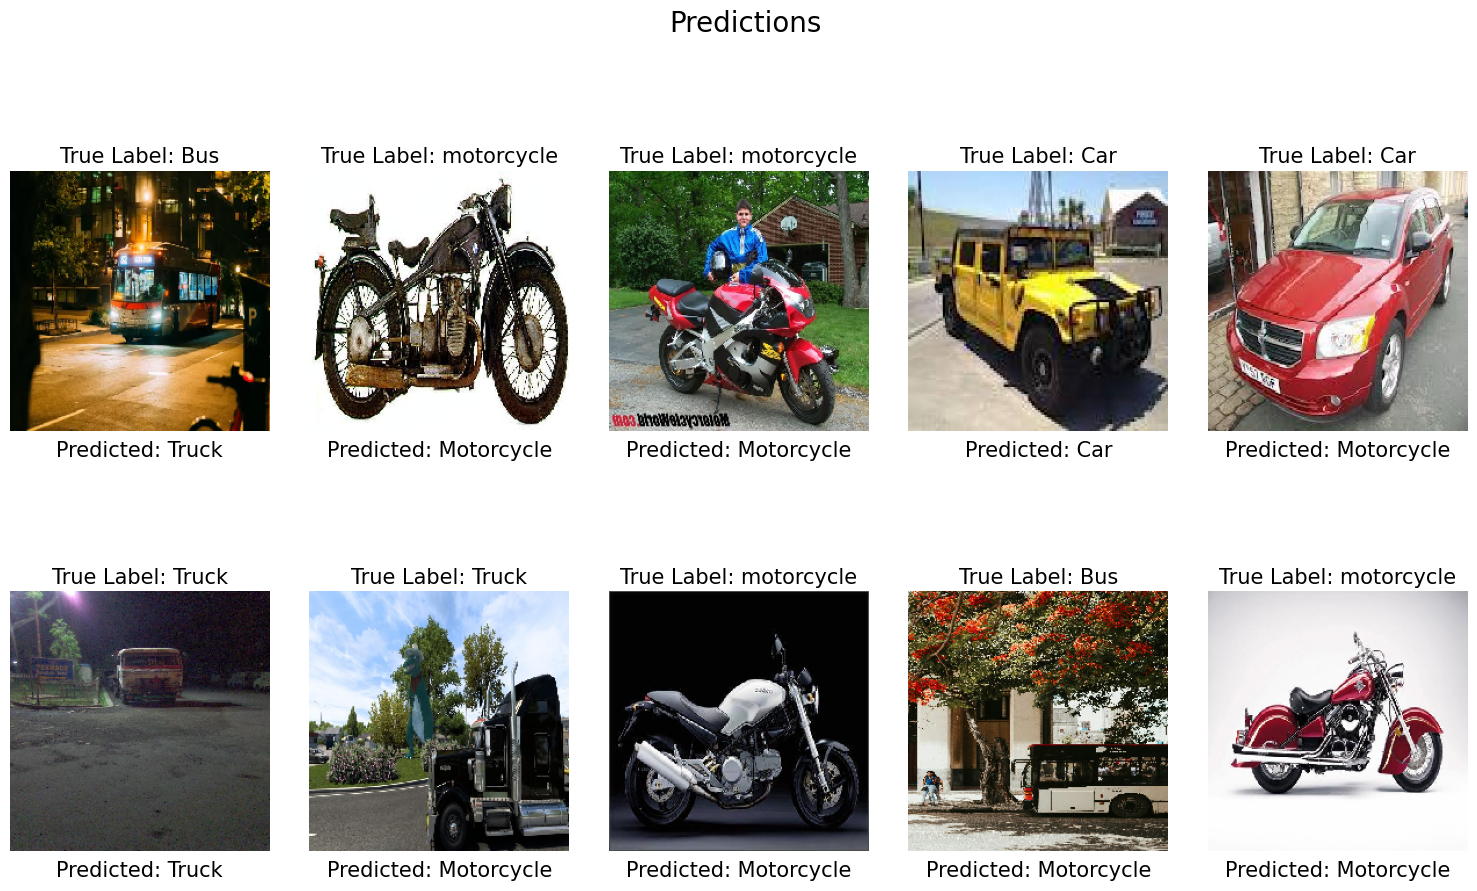

In [20]:
# Define the output directory based on the model used
output_dir = f"./prediction/{model_name}/randomimagestest"
os.makedirs(output_dir, exist_ok=True)

# Plot the random images with their true and predicted labels
plt.figure(figsize=(15, 10))
for i, (img_path, true_label, predicted_label) in enumerate(zip([x[0] for x in random_images], true_labels, predictions)):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.suptitle("Predictions", fontsize=20)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True Label: {true_label}", fontsize=15, loc='center')  # True label above image
    plt.text(
        0.5, -0.1, f"Predicted: {predicted_label}",
        fontsize=15, ha='center', transform=plt.gca().transAxes
    )
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "output.png"))
plt.show()
plt.close()

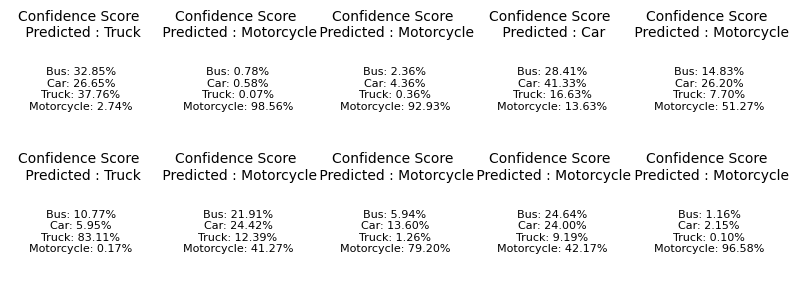

In [21]:
# Plot the confidence scores for the predictions
plt.figure(figsize=(8, 3))
for i, (img_path, confidence_scores) in enumerate(zip([x[0] for x in random_images], confidence_scores_list)):
    confidence_text = "\n".join(
        [f"{index_to_class[idx]}: {confidence_scores[idx] * 100:.2f}%" for idx in range(len(confidence_scores))]
    )
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.title(f"Confidence Score \n Predicted : {predictions[i]}", fontsize=10, loc='center')
    plt.gcf().text(
        0.5, 0.3, confidence_text, fontsize=8, ha="center", transform=plt.gca().transAxes
    )
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "confidence_scores.png"), bbox_inches="tight", dpi=300)
plt.show()
plt.close()